In [1]:
using Pkg; Pkg.activate(".."); Pkg.instantiate()

using OceanTurb, PyPlot

import OceanTurb: Diffusion              

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Info: Precompiling OceanTurb [d848d694-35fd-11e9-1c91-9995598ac29e]
└ @ Base loading.jl:1189


In [2]:
model = Diffusion.Model(nz=1000, Lz=100.0, κ=1);

In [4]:
z0, dz = -model.grid.Lz/2, model.grid.Lz/20
c0(z) = exp(-(z-z0)^2 / 2dz^2)
@show typeof(c0) typeof(model.solution)


model.solution = c0

# pressures.pHY = pHY_profile

typeof(c0) = typeof(c0)
typeof(model.solution) = CellField{Array{Float64,1},UniformGrid{Float64,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}


MethodError: MethodError: Cannot `convert` an object of type typeof(c0) to an object of type CellField
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T at essentials.jl:154

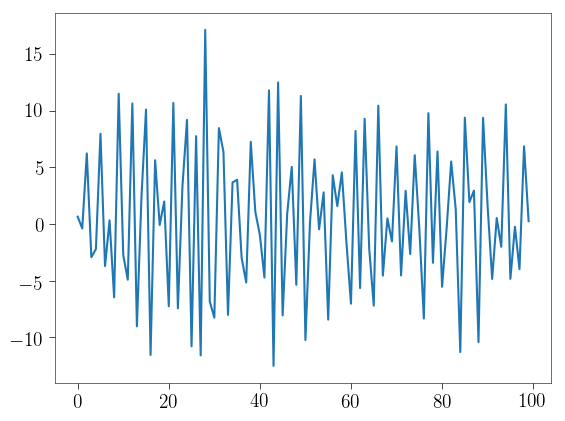

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1304fd6d8>

In [10]:
plot(model.solution.data)

for i = 1:8
    Diffusion.step!(model, 10, 100)
    plot(model.solution.data)
end